### 1. Installing dependencies

In [2]:
import tensorflow as tf
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

### 2. Getting the data from directory 

In [21]:
file_path = 'C:\\Users\\bmall\\OneDrive\\Desktop\\Alzheimer-Disease-Prediction-main\\colab dataseet'

data_dir = pathlib.Path(file_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['m-d123' 'mod-d234' 'non-d345' 'vm-d456']


### 3. Visualizing random images with labels from the data

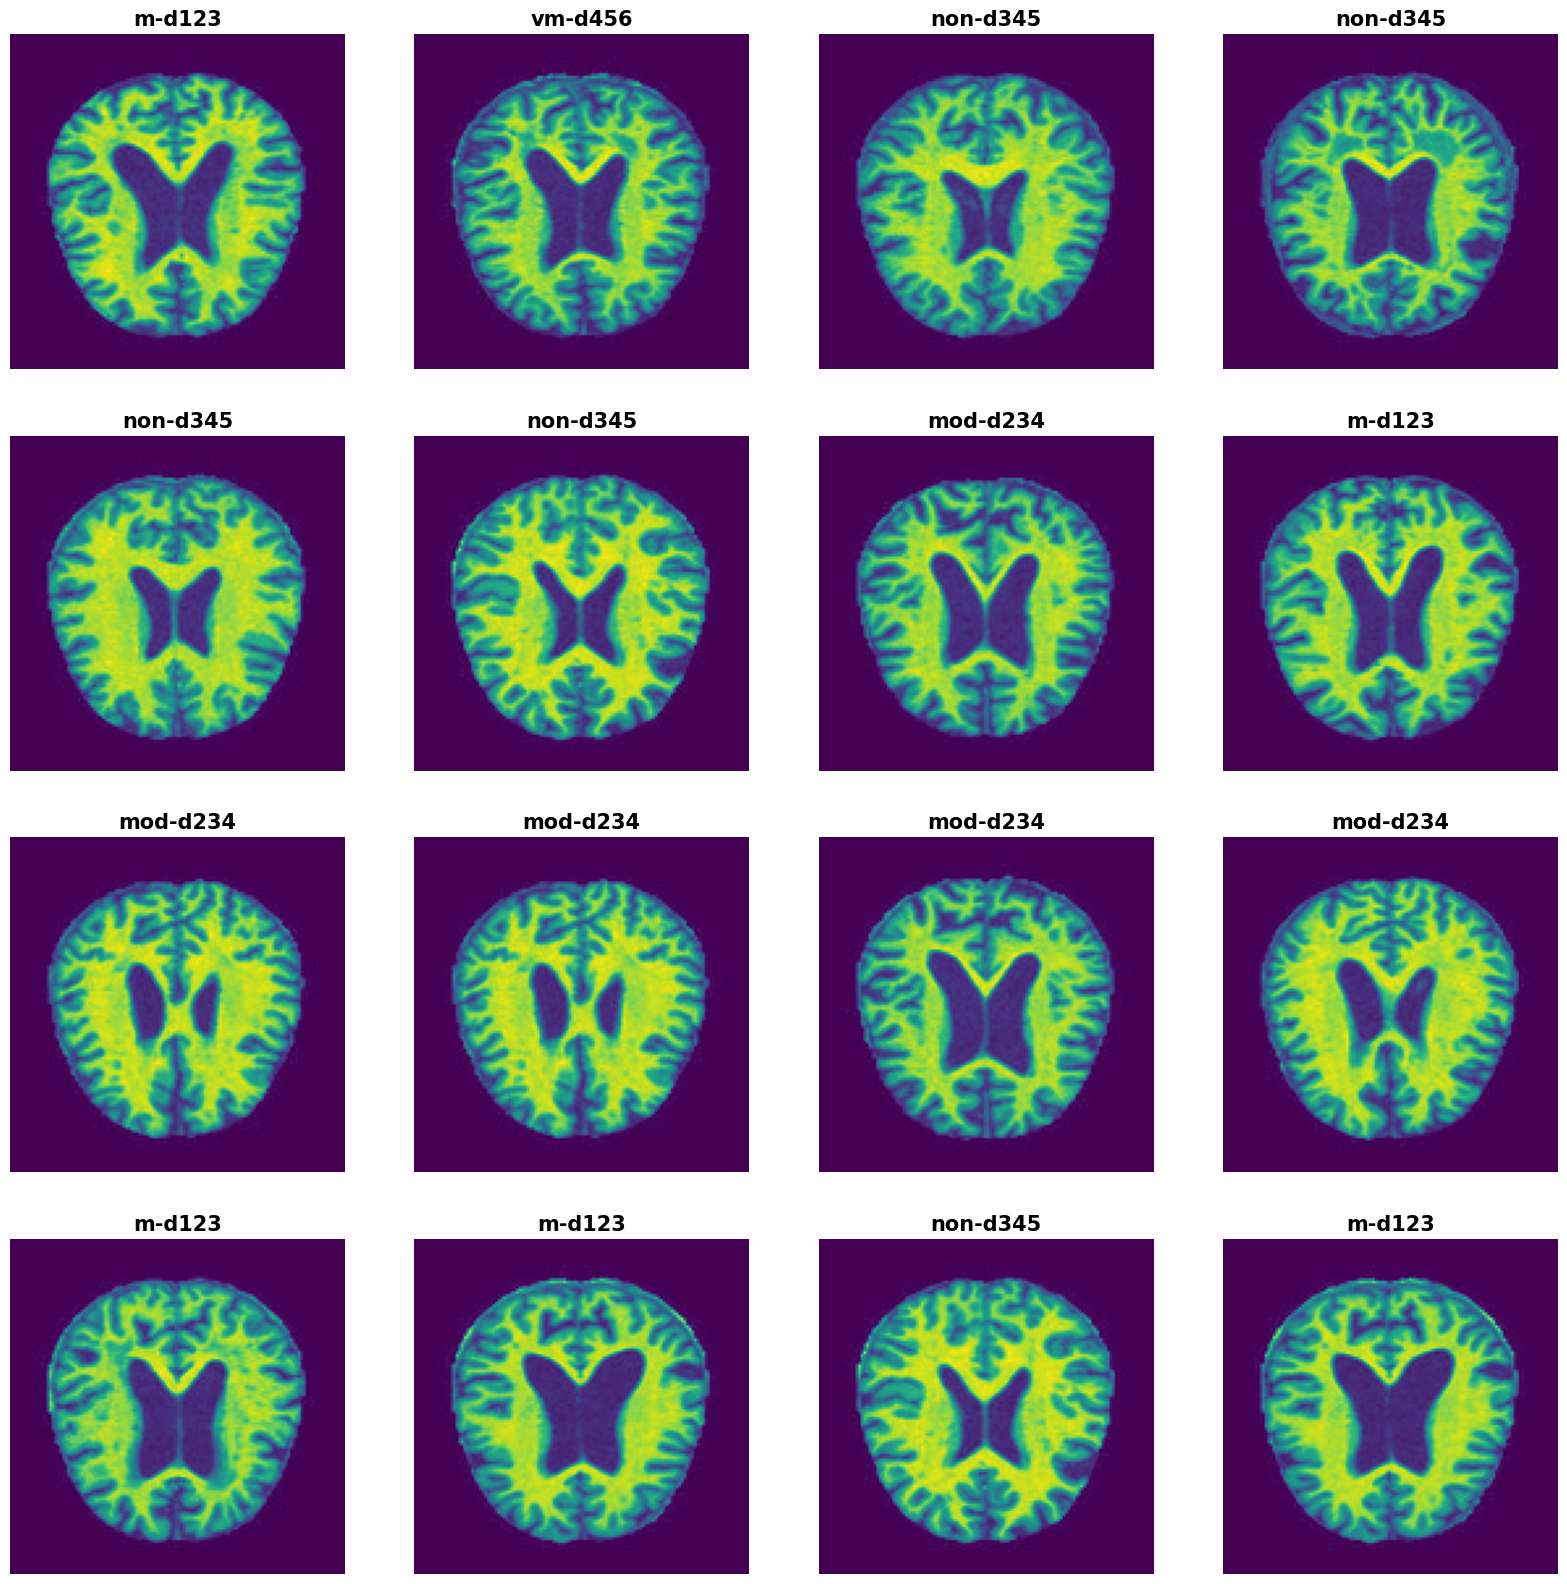

In [22]:
import random
import os
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20)) 

for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    
    # Ensure class_names has at least 4 elements
    if len(class_names) >= 4:
        random_class = random.randint(0, 3)
        folder_path = file_path + '/' + class_names[random_class]
        
        # Check if the folder contains any images
        if os.path.exists(folder_path) and os.path.isdir(folder_path):
            images_in_folder = os.listdir(folder_path)
            
            if images_in_folder:
                random_image_path = folder_path + '/' + random.choice(images_in_folder)
                image = plt.imread(random_image_path)
                
                plt.axis('off')
                plt.title(class_names[random_class], fontsize=15, fontweight='bold')
                plt.imshow(image)
            else:
                print(f"No images found in {folder_path}")
        else:
            print(f"Folder {folder_path} does not exist or is not a directory.")
    else:
        print("class_names should have at least 4 elements.")


### 4. Preparing the dataset for building CNN

In [23]:
SEED = 1   # maybe can do with random seed generator and compare results with different seed values in the future.
BATCH_SIZE = 32
IMG_SIZE = (128, 128)

X_train = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    subset = 'training'
)

X_validation = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    subset = 'validation'
)

Found 40 files belonging to 4 classes.
Using 32 files for training.
Found 40 files belonging to 4 classes.
Using 8 files for validation.


### 5. Building the model

In [24]:
INPUT_SHAPE = IMG_SIZE + (3,)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Rescaling(scale=1./255, input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.20))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation = 'softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)      

### 6. Fitting the model

In [25]:
history = model.fit(X_train, epochs = 50, validation_data=X_validation, verbose=1)

Epoch 1/50


1/1 [==============================] - 4s 4s/step - loss: 1.3946 - accuracy: 0.2500 - val_loss: 2.7321 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 365ms/step - loss: 1.6945 - accuracy: 0.3125 - val_loss: 1.1628 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 357ms/step - loss: 1.4735 - accuracy: 0.2188 - val_loss: 1.1937 - val_accuracy: 0.3750
Epoch 4/50
1/1 [==============================] - 0s 317ms/step - loss: 1.4408 - accuracy: 0.2188 - val_loss: 1.2926 - val_accuracy: 0.3750
Epoch 5/50
1/1 [==============================] - 0s 378ms/step - loss: 1.3459 - accuracy: 0.2188 - val_loss: 1.4028 - val_accuracy: 0.2500
Epoch 6/50
1/1 [==============================] - 0s 345ms/step - loss: 1.2890 - accuracy: 0.4375 - val_loss: 1.5070 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 320ms/step - loss: 1.2736 - accuracy: 0.3125 - val_loss: 1.5481 - val_accuracy: 0.0000e+00
Epoch 8/5

### 7. Model evaluation

In [26]:
model_evaluate = model.evaluate(X_validation)
print("Accuracy: %", "{:.2f}".format(model_evaluate[1]*100))
print("Loss: %", "{:.2f}".format(model_evaluate[0]*100))

1/1 [==============================] - 0s 104ms/step - loss: 0.5594 - accuracy: 0.7500


Accuracy: % 75.00
Loss: % 55.94


[]

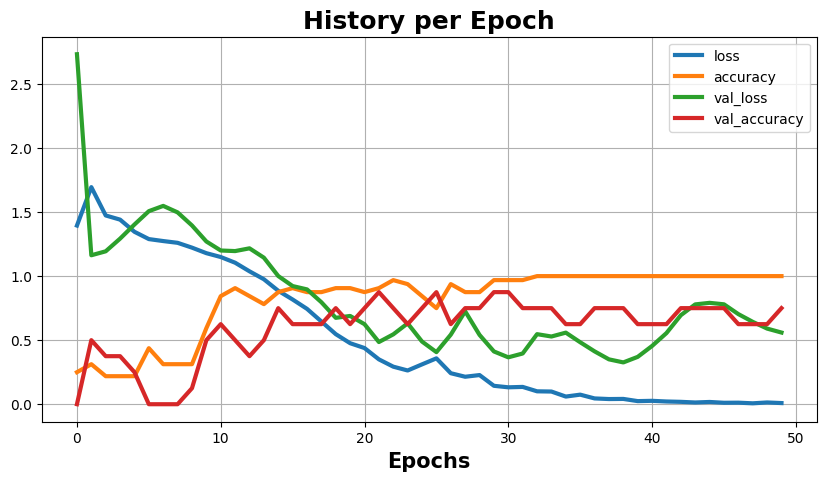

In [27]:
df = pd.DataFrame(history.history)
ax = df.plot(figsize=(10,5), lw=3, grid='on')
ax.set_title('History per Epoch', fontsize=18, fontweight='bold')
ax.set_xlabel('Epochs', fontsize=15, fontweight='bold')
ax.plot()

1/1 [==============================] - 0s 54ms/step


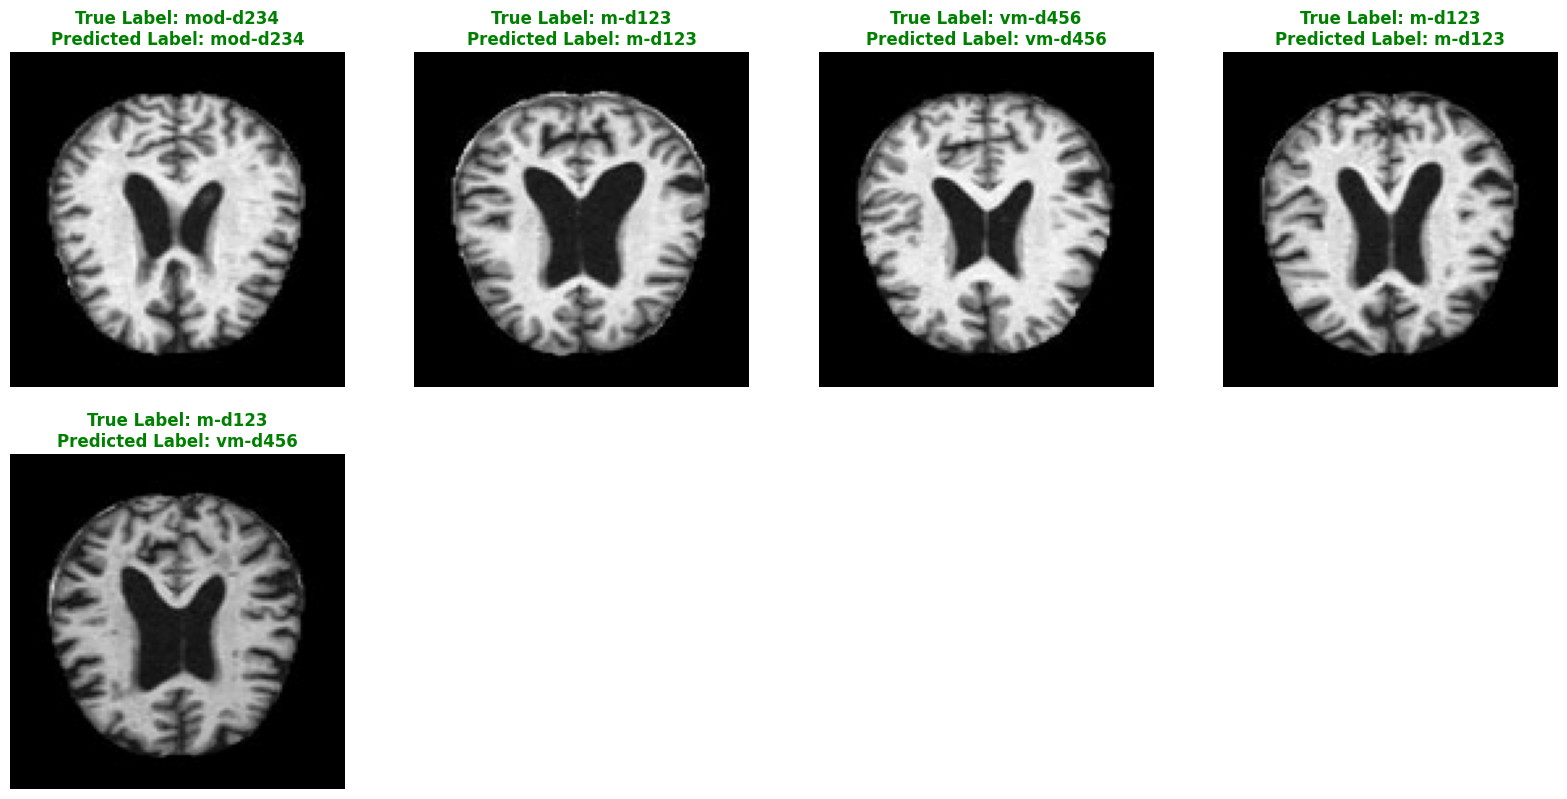

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

for images, labels in X_validation.take(1): 
    for i in range(5):
        ax = plt.subplot(4, 4, i+1)
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        predicted_class = np.argmax(model.predict(img))
        plt.axis('off')
        plt.title("True Label: {}\nPredicted Label: {}".format(class_names[labels[i]], class_names[predicted_class]), fontsize=12, fontweight='bold', color='green')
        plt.imshow(images[i].numpy().astype("uint8"))

plt.show()
